<a href="https://colab.research.google.com/github/lata-11/Image-processing-assignments/blob/main/Application_of_different_filter_of_different_sizes_on_jpg_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [10]:
image_path = '/content/20090809_Lotus_flower_2736.jpg.crdownload'


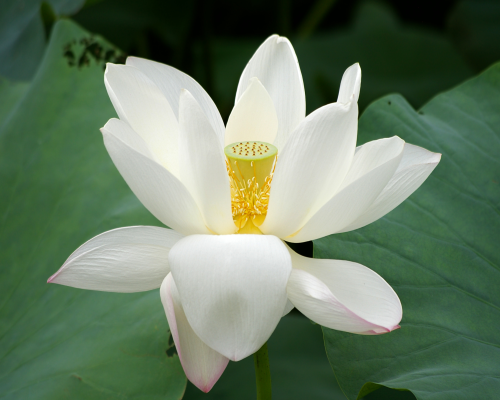

In [20]:
img = cv2.imread(image_path)

# Display the image
new_width = 500
new_height = 400
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Display the resized image using cv2_imshow
cv2_imshow(resized_img)

In [21]:
# Define filter functions
def apply_mean_filter(img, kernel_size):
  """Applies a mean filter to the image.

  Args:
      img: The input image as a NumPy array.
      kernel_size: The size of the mean filter kernel (e.g., 3x3, 5x5).

  Returns:
      The filtered image as a NumPy array.
  """
  return cv2.blur(img, (kernel_size, kernel_size))

In [22]:
def apply_median_filter(img, kernel_size):
  """Applies a median filter to the image.

  Args:
      img: The input image as a NumPy array.
      kernel_size: The size of the median filter kernel (e.g., 3x3, 5x5).

  Returns:
      The filtered image as a NumPy array.
  """
  return cv2.medianBlur(img, kernel_size)

In [23]:
def apply_gaussian_filter(img, kernel_size, sigma):
  """Applies a Gaussian filter to the image.

  Args:
      img: The input image as a NumPy array.
      kernel_size: The size of the Gaussian filter kernel (e.g., 3x3, 5x5).
      sigma: The standard deviation of the Gaussian distribution.

  Returns:
      The filtered image as a NumPy array.
  """
  return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)


In [35]:
def apply_sobel_filter(img, ksize=3):
  """Applies Sobel filter for edge detection.

  Args:
      img: The input image as a NumPy array.
      ksize: The size of the Sobel filter kernel (usually 3x3).

  Returns:
      The edge-detected image as a NumPy array.
  """
  # Apply Sobel in x and y directions
  sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
  sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
  # Combine x and y gradients (absolute values)
  return cv2.absdiff(sobelx, sobely)

In [45]:
def apply_laplacian_filter(img):
  """Applies Laplacian filter for edge detection.

  Args:
      img: The input image as a NumPy array (grayscale).

  Returns:
      The edge-detected image as a NumPy array.
  """
  # Define Laplacian kernel
  laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

  # Apply filter using convolution
  return cv2.filter2D(img.astype(np.float32), -1, laplacian_kernel.astype(np.float32))

In [46]:
# Read the image
img = cv2.imread(image_path)

# Resize the image
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Define filter applications
filters = [
    ("Original", resized_img),
    ("Mean Filter (3x3)", apply_mean_filter(resized_img.copy(), 3)),
    ("Mean Filter (5x5)", apply_mean_filter(resized_img.copy(), 5)),
    ("Mean Filter (7x7)", apply_mean_filter(resized_img.copy(), 5)),
    ("Median Filter (5x5)", apply_median_filter(resized_img.copy(), 5)),
    ("Median Filter (7x7)", apply_median_filter(resized_img.copy(), 5)),
    ("Median Filter (11x11)", apply_median_filter(resized_img.copy(), 5)),
    ("Gaussian Filter (5x5, sigma=1)", apply_gaussian_filter(resized_img.copy(), 5, 1)),
    ("Gaussian Filter (7x7, sigma=1)", apply_gaussian_filter(resized_img.copy(), 5, 1)),
    ("Gaussian Filter (11x11, sigma=1)", apply_gaussian_filter(resized_img.copy(), 5, 1)),
    ("Gaussian Filter (5x5, sigma=2)", apply_gaussian_filter(resized_img.copy(), 5, 2)),
    ("Gaussian Filter (7x7, sigma=2)", apply_gaussian_filter(resized_img.copy(), 5, 2)),
    ("Gaussian Filter (11x11, sigma=2)", apply_gaussian_filter(resized_img.copy(), 5, 2)),
    ("Sobel Filter", apply_sobel_filter(resized_img)),
    ("Laplacian Filter", apply_laplacian_filter(resized_img))

]

**Original**


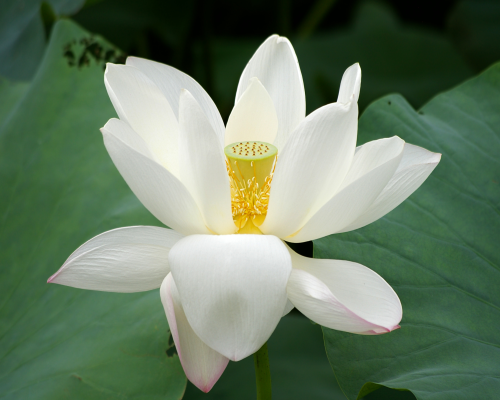

**Mean Filter (3x3)**


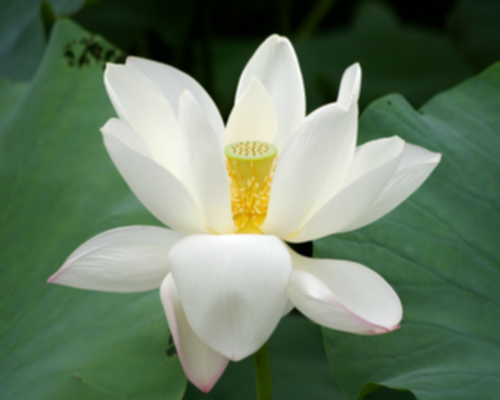

**Mean Filter (5x5)**


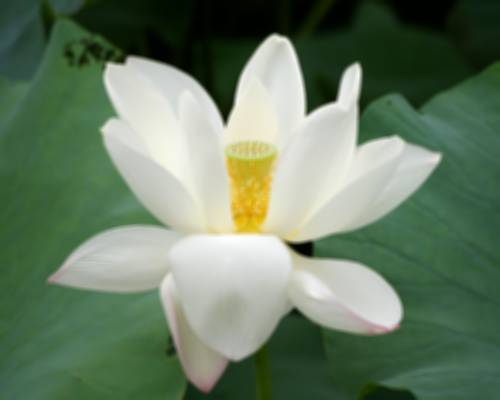

**Mean Filter (7x7)**


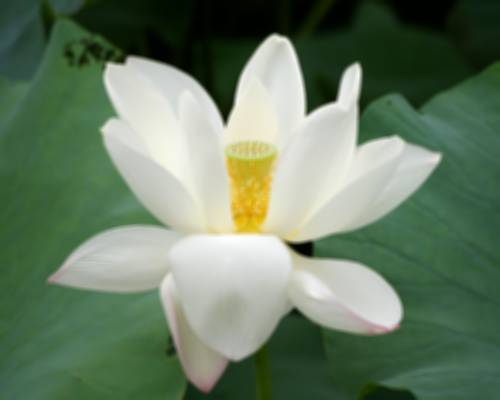

**Median Filter (5x5)**


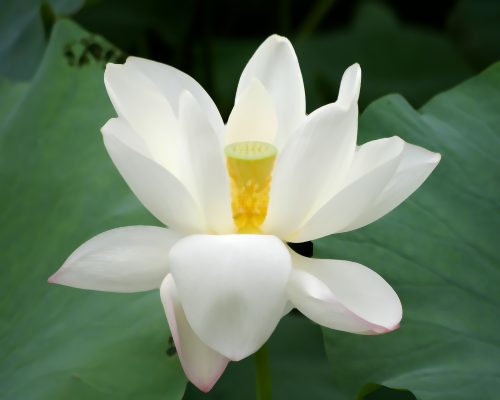

**Median Filter (7x7)**


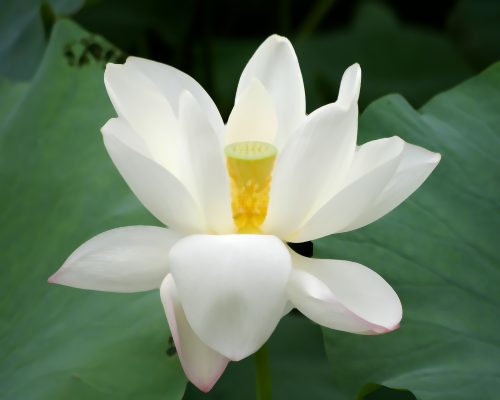

**Median Filter (11x11)**


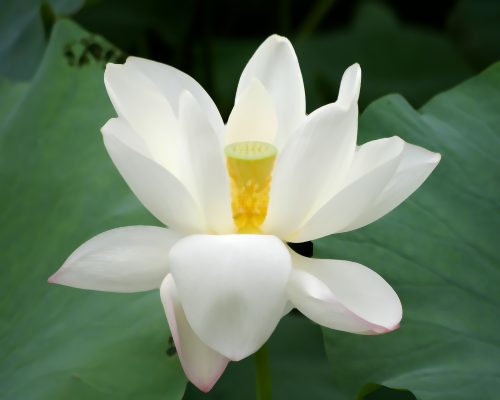

**Gaussian Filter (5x5, sigma=1)**


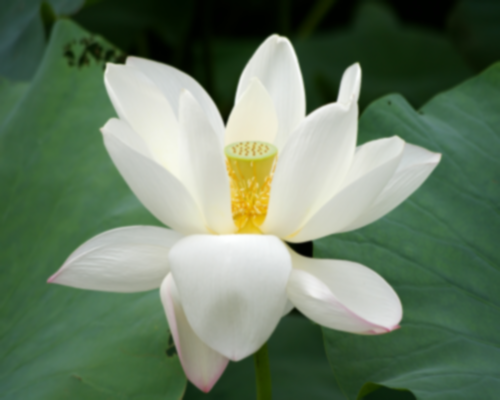

**Gaussian Filter (7x7, sigma=1)**


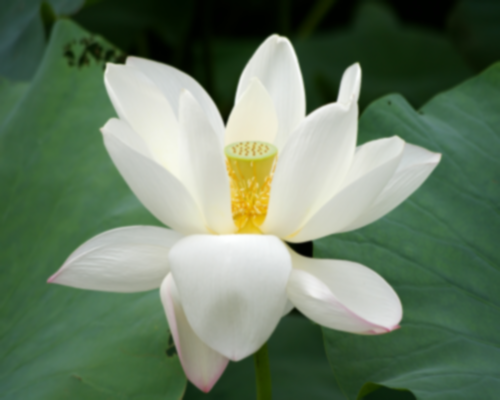

**Gaussian Filter (11x11, sigma=1)**


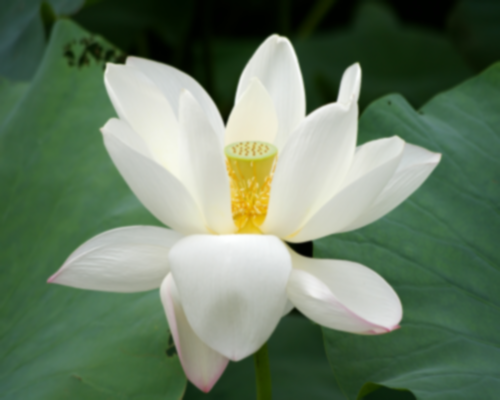

**Gaussian Filter (5x5, sigma=2)**


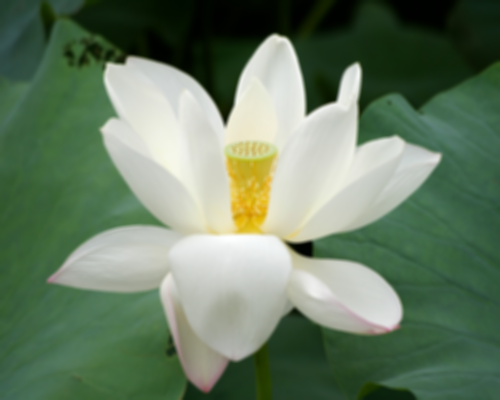

**Gaussian Filter (7x7, sigma=2)**


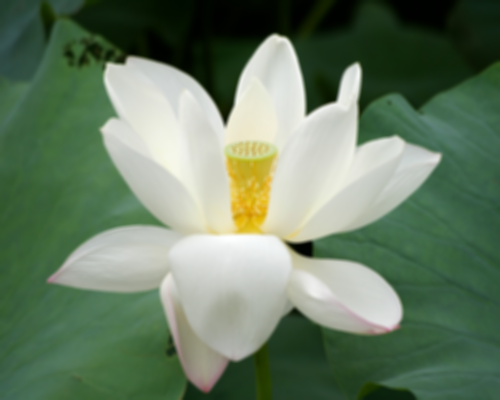

**Gaussian Filter (11x11, sigma=2)**


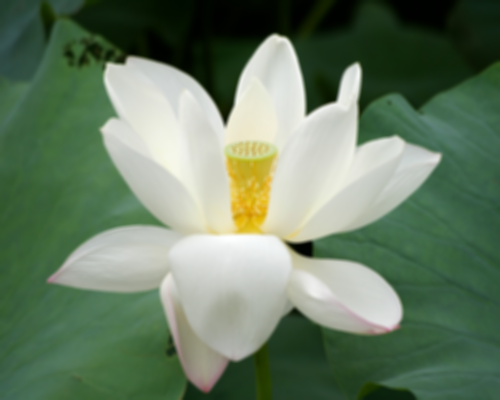

**Sobel Filter**


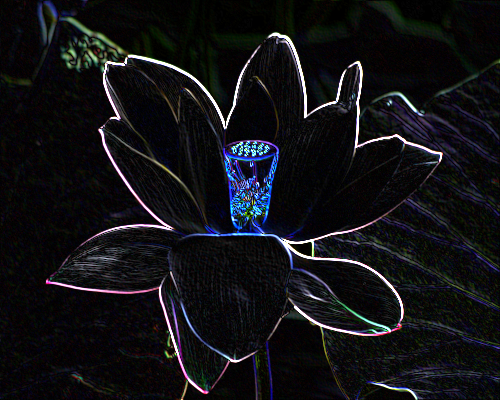

**Laplacian Filter**


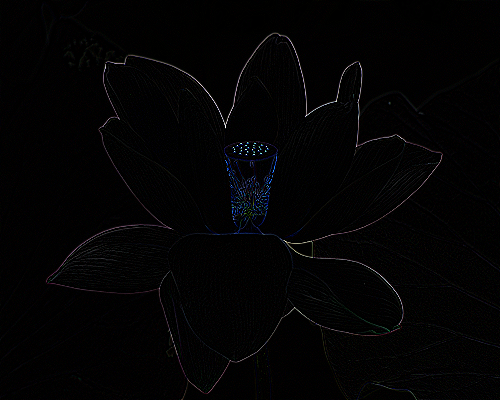

In [47]:
# Display results using cv2_imshow
for title, image in filters:
  print(f"**{title}**")  # Print the title
  cv2_imshow(image)